# Pretrained MNIST

## Importing required packages

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch 
import torch.nn as nn 
import torch.nn.functional as F
from  torch.utils.data import DataLoader, SubsetRandomSampler
import torch.optim
from torchvision import datasets,transforms
from pytorch_lightning import seed_everything
import pytorch_lightning as pl
import pandas as pd
import random


from sklearn.manifold import TSNE
from enum import auto
from sklearn.decomposition import PCA
import seaborn as sns

import torch.nn.init as init
import os
os.chdir("/Users/federicoferoggio/Documents/vs_code/latent-communication")

## Defining transforms

In [3]:
transforms=transforms.ToTensor()

## Downloading requried data

In [4]:
train_data=datasets.MNIST('data',train=True,download=True,transform=transforms)
test_data=datasets.MNIST('data',train=False,download=True,transform=transforms)

## Defining dataloaders

In [5]:
valid_size=0.2

# IMPORTANT 
batch_size=20

num_workers=0

train_length = len(train_data)

# obtain training dataset indices that will be used for validation dataset
indices = list(range(train_length))

np.random.shuffle(indices)
split = int(np.floor(valid_size * train_length))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders for train, test and validation dataset
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

In [6]:

# Printing the length of our train, valid and test dataloaders
# NOTE : Here batch size is 20
len(train_loader),len(valid_loader),len(test_loader)

(2400, 600, 500)

In [7]:
# Iterate over the data loader to get a batch of data
dataiter = iter(train_loader)

# Print the data iterator
print("Data Iterator:", dataiter)

# Get the next batch of images and labels
images, labels = next(dataiter)

# Print information about the images
print("Images:")
print(images)
print("Shape:", images.shape)
print("Number of Images:", len(images))
print("Shape of First Image:", images[0].shape)
print()

# Print information about the labels
print("Labels:")
print(labels)
print("Shape:", labels.shape)
print("Number of Labels:", len(labels))


Data Iterator: <torch.utils.data.dataloader._SingleProcessDataLoaderIter object at 0x15f7c7790>
Images:
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..

## Visualizing a Training batch

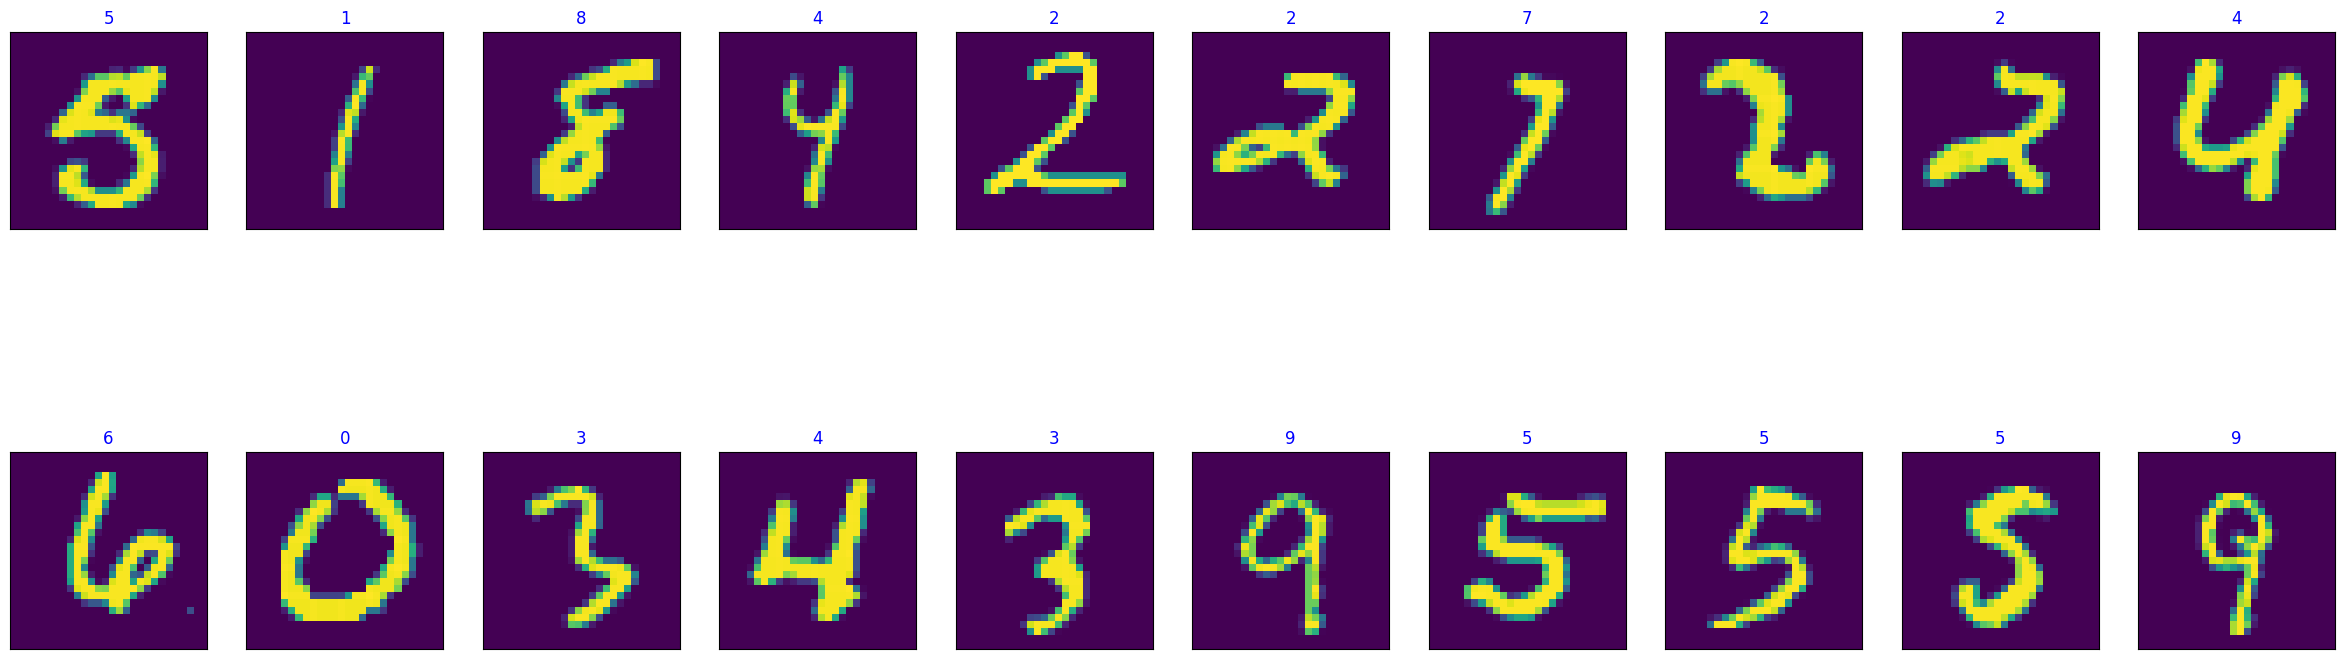

In [8]:
# Displaying images and labels of a batch
fig=plt.figure(figsize=(30,10))
for i in range(len(labels)):
    ax=fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
    plt.imshow(np.squeeze(images[i]))
    ax.set_title(labels[i].item(),color='blue')

# Encoder/Decoder Seperation

## Defining Architecture

In [3]:
import os
os.chdir("/Users/federicoferoggio/Documents/vs_code/latent-communication")
from models.definitions.ae_more_channels import LightningAutoencoderV2
import numpy as np 
import matplotlib.pyplot as plt 
import torch 
import torch.nn as nn 
import torch.nn.functional as F
from  torch.utils.data import DataLoader, SubsetRandomSampler
import torch.optim
from torchvision import datasets,transforms
from pytorch_lightning import seed_everything
import pytorch_lightning as pl
import pandas as pd
import random


from sklearn.manifold import TSNE
from enum import auto
from sklearn.decomposition import PCA
import seaborn as sns


model = LightningAutoencoderV2()
state_dict = torch.load('models/checkpoints/AE/CIFAR100/cifar100_ae_model.pth')

new_state_dict = {k: v for k, v in state_dict.items() if k in model.state_dict()}
print(new_state_dict.keys())

model.load_state_dict(new_state_dict)

#print(model_0,'\n\n\n\n',model_1,'\n\n\n\n',model_2,'\n\n\n\n',model_3, model_4,'\n\n\n\n','On GPU : ',torch.cuda.is_available())
#print(model_1,'\n\n\n\n',model_2,'\n\n\n\n',model_3,'\n\n\n\n','On GPU : ',torch.cuda.is_available())

dict_keys(['autoencoder.encoder.0.0.weight', 'autoencoder.encoder.0.0.bias', 'autoencoder.encoder.0.1.weight', 'autoencoder.encoder.0.1.bias', 'autoencoder.encoder.0.1.running_mean', 'autoencoder.encoder.0.1.running_var', 'autoencoder.encoder.0.1.num_batches_tracked', 'autoencoder.encoder.1.0.weight', 'autoencoder.encoder.1.0.bias', 'autoencoder.encoder.1.1.weight', 'autoencoder.encoder.1.1.bias', 'autoencoder.encoder.1.1.running_mean', 'autoencoder.encoder.1.1.running_var', 'autoencoder.encoder.1.1.num_batches_tracked', 'autoencoder.encoder.2.0.weight', 'autoencoder.encoder.2.0.bias', 'autoencoder.encoder.2.1.weight', 'autoencoder.encoder.2.1.bias', 'autoencoder.encoder.2.1.running_mean', 'autoencoder.encoder.2.1.running_var', 'autoencoder.encoder.2.1.num_batches_tracked', 'autoencoder.encoder.3.0.weight', 'autoencoder.encoder.3.0.bias', 'autoencoder.encoder.3.1.weight', 'autoencoder.encoder.3.1.bias', 'autoencoder.encoder.3.1.running_mean', 'autoencoder.encoder.3.1.running_var', 'aut

RuntimeError: Error(s) in loading state_dict for LightningAutoencoderV2:
	size mismatch for autoencoder.decoder.1.0.weight: copying a param with shape torch.Size([128, 64, 4, 4]) from checkpoint, the shape in current model is torch.Size([128, 64, 3, 3]).

## Defining our Loss Function

In [14]:
# Used when comapring pixel values.
criterion=nn.MSELoss()

def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

## Training and Validation Phase

In [15]:
from lightning.pytorch.callbacks import ModelCheckpoint

from lightning.pytorch import seed_everything

seeds = [12345, 100000000, 100, 65583745839]
for i, seed in enumerate(seeds):
    print(seed)
    seed_everything(seed)
    set_random_seed(seed)
    model = LightningAutoencoder()
    model.apply(model.init_weights)
    model.train()
    trainer = pl.Trainer(max_epochs=10)
    trainer.fit(model, train_loader, valid_loader)
    torch.save(model.state_dict(), f'LightningAutoencoder_{i}.pth')

# def trainNet(model, path):
#     checkpoint_callback = ModelCheckpoint(dirpath="", save_top_k=2, monitor="val_loss")
#     model.train() # TURN ON DROPOUT for training
#     trainer = pl.Trainer(max_epochs=3)
#     trainer.fit(model, train_loader, valid_loader)

Seed set to 12345


12345


GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/federicoferoggio/Documents/vs_code/latent-communication/.zeroshot/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default


TypeError: `model` must be a `LightningModule` or `torch._dynamo.OptimizedModule`, got `LightningAutoencoder`

In [12]:
#m4_loss = trainNet(model_4,0.01, 'conv')

## Plotting Loss

In [13]:
!tensorboard --logdir lightning_logs/

Traceback (most recent call last):
  File "/Users/federicoferoggio/Library/Python/3.9/bin/tensorboard", line 5, in <module>
    from tensorboard.main import run_main
  File "/Users/federicoferoggio/Library/Python/3.9/lib/python/site-packages/tensorboard/main.py", line 26, in <module>
    from absl import app
ModuleNotFoundError: No module named 'absl'


## Testing Phase

In [14]:
def test(model,state='fully'):
    # obtain one batch of test images
    dataiter = iter(test_loader)
    images, _ = next(dataiter)
    if state=='fully':
        images = images.view(images.size(0), -1)

    # get sample outputs
    output = model(images)
    # prep images for display
    images = images.cpu().numpy()
    # output is resized into a batch of images
    output = output.view(batch_size, 1, 28, 28)
    # use detach when it's an output that requires_grad
    output = output.cpu().detach().numpy()


    # plot the first ten input images and then reconstructed images
    fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))

    # input images on top row, reconstructions on bottom
    for images, row in zip([images, output], axes):
        for img, ax in zip(images, row):
            if state=='fully':
                img = img.reshape(1, 28, 28)
            ax.imshow(np.squeeze(img), cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            

## Pretrained Autoencoder

In [15]:
model_1 = LightningAutoencoder.load_from_checkpoint(checkpoint_path='LightningAutoencoder_0.ckpt')
model_2 = LightningAutoencoder.load_from_checkpoint(checkpoint_path='LightningAutoencoder_1.ckpt')
model_3 = LightningAutoencoder.load_from_checkpoint(checkpoint_path='LightningAutoencoder_2.ckpt')


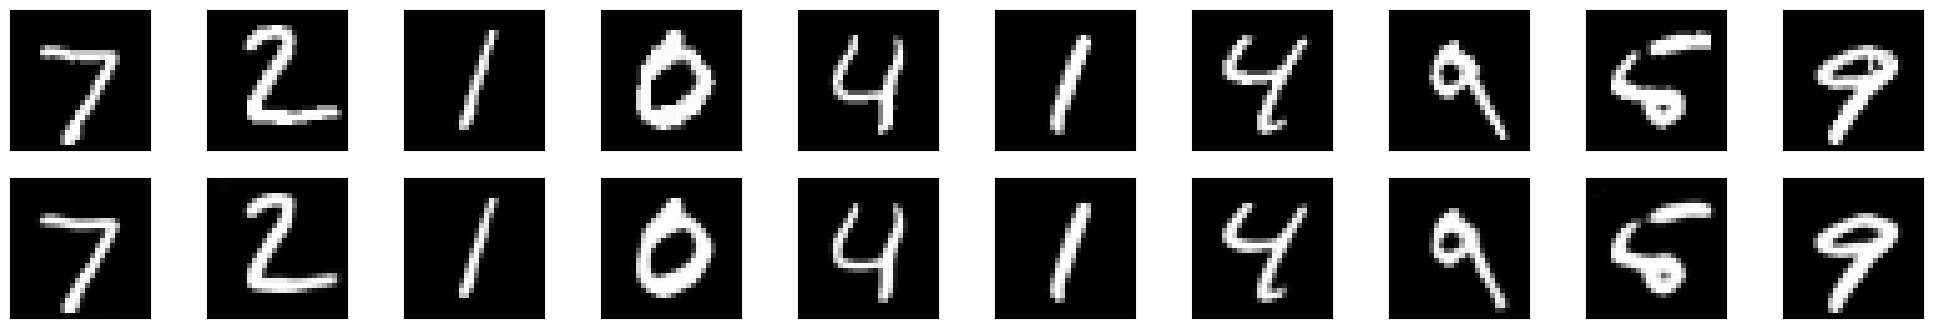

In [16]:
test(model_1, 'conv')

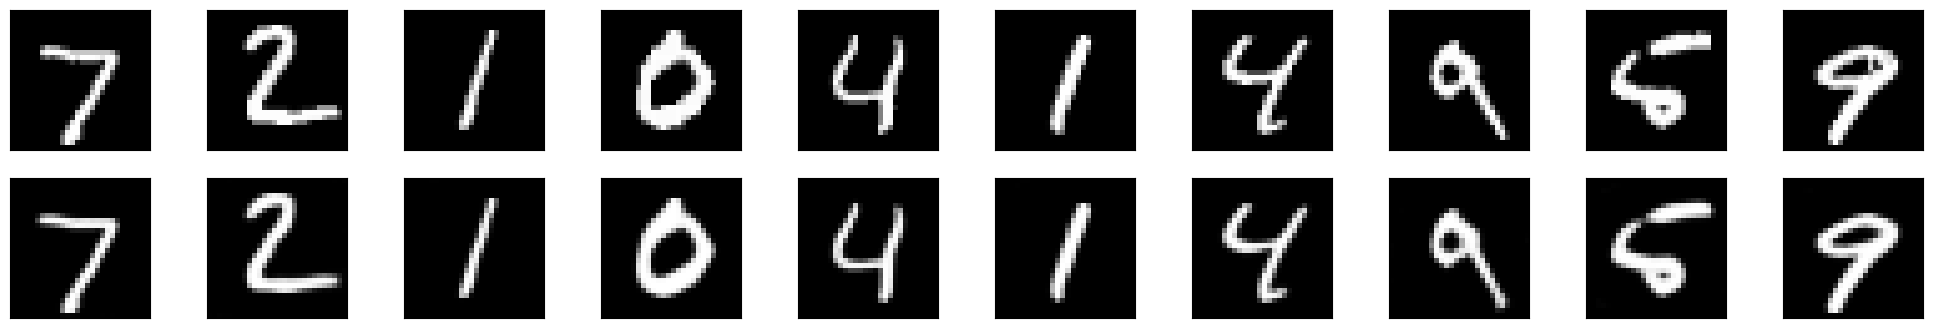

In [17]:
test(model_2, 'conv')  

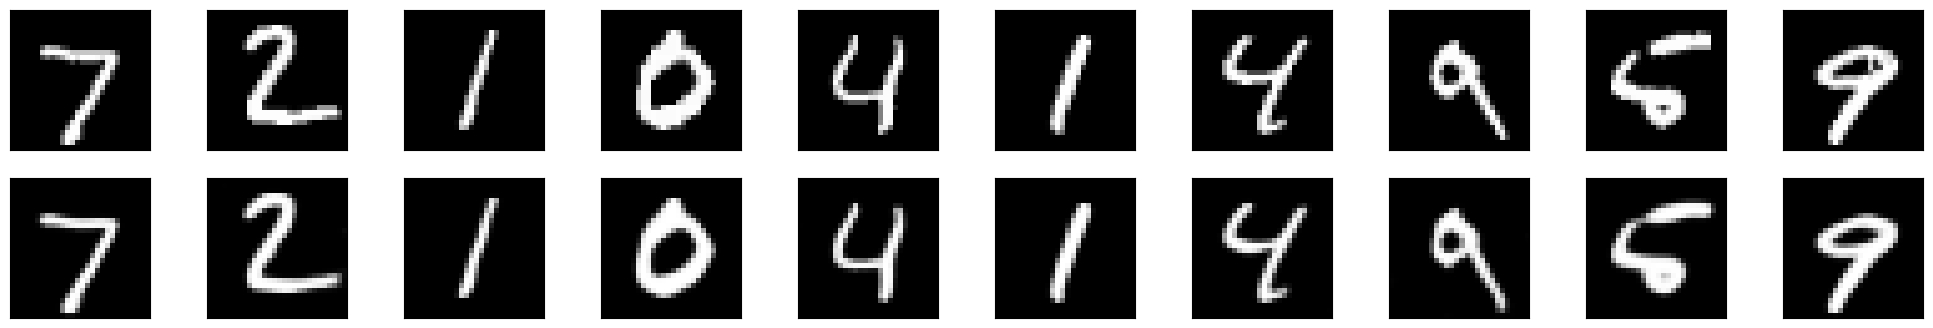

In [18]:
test(model_3, 'conv')

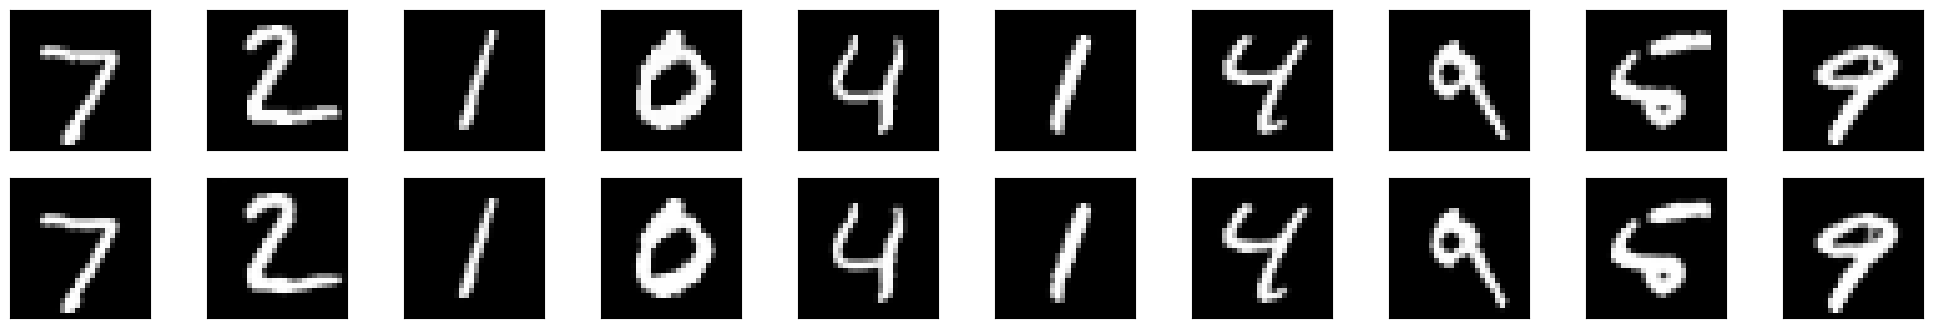

In [19]:
test(model_4,'conv')

## Visualize latent space

In [20]:
# Print Model Summary 
model = model_4

In [21]:
def get_encoder_outputs(model, test_loader, max_batches=None):
    model.eval()
    encoded_images = []
    labels_list = []
    num_batches_processed = 0

    for images, labels in test_loader:
        with torch.no_grad():  # Ensure no gradients are calculated
            encoded_output = model(images)

        # Append the encoded images and corresponding labels to lists
        encoded_images.append(encoded_output.cpu())  # Store on CPU
        labels_list.append(labels)

        num_batches_processed += 1
        if max_batches is not None and num_batches_processed >= max_batches:
            break  # Stop processing after reaching the specified max_batches

    # Concatenate the lists to create tensors for encoded images and labels
    encoded_images = torch.cat(encoded_images, dim=0)
    labels_tensor = torch.cat(labels_list, dim=0)

    return encoded_images, labels_tensor

In [22]:
latents,labels=get_encoder_outputs(model,test_loader,max_batches=50)

### Visualize with PCA

In [23]:
def visualize_latent_space_pca(latents, labels, anchors=None):
    # Convert the 4D latent space to 2D using PCA
    pca = PCA(n_components=2)
    latents_2d = pca.fit_transform(latents.view(latents.size(0), -1).cpu().detach().numpy())

    # Create a DataFrame for easy plotting
    latent_df = pd.DataFrame(latents_2d, columns=['PC1', 'PC2'])
    latent_df['Label'] = labels.numpy()

    # Plot the 2D latent space
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=latent_df, x='PC1', y='PC2', hue='Label', palette='tab10')
    plt.title('2D PCA of Latent Space')
    if anchors is not None:
        # Plot anchors with star marker
        anchors_2d = pca.transform(anchors.view(anchors.size(0), -1).cpu().detach().numpy())
        plt.scatter(anchors_2d[:, 0], anchors_2d[:, 1], marker='*', s=100, c='black')
    plt.show()

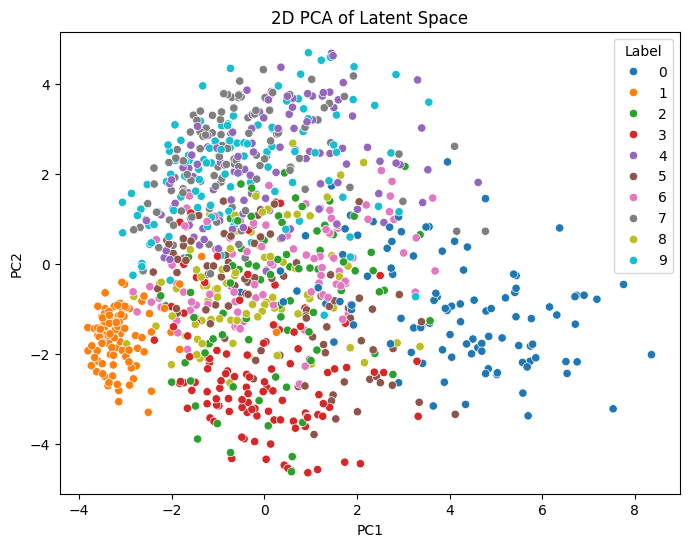

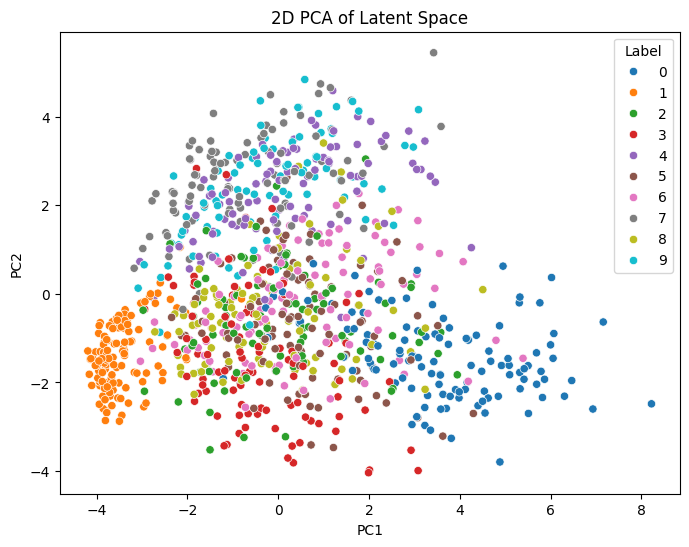

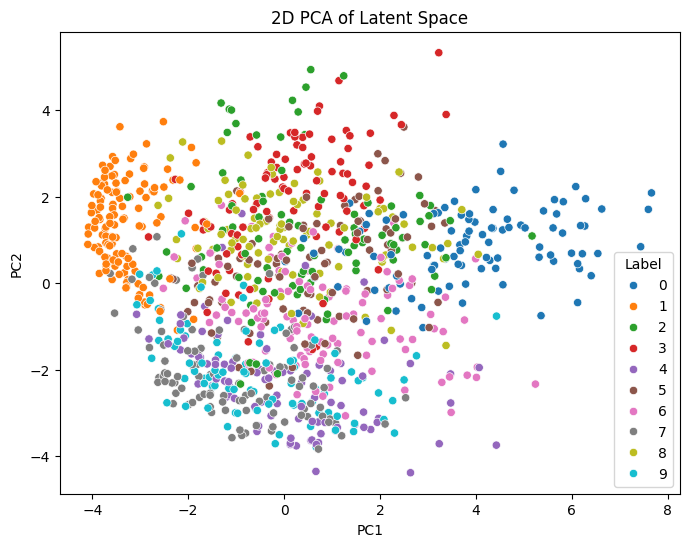

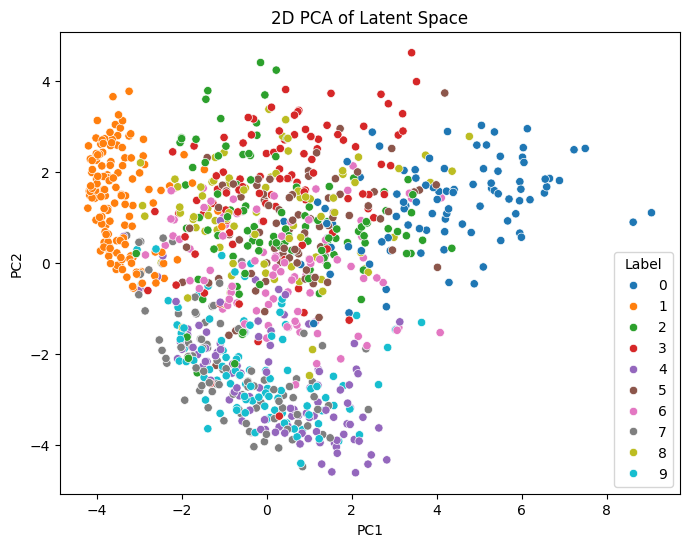

In [24]:
model_1 = LightningAutoencoder.load_from_checkpoint(checkpoint_path='LightningAutoencoder_0.ckpt')
model_2 = LightningAutoencoder.load_from_checkpoint(checkpoint_path='LightningAutoencoder_1.ckpt')
model_3 = LightningAutoencoder.load_from_checkpoint(checkpoint_path='LightningAutoencoder_2.ckpt')


latents_1, labels_1 = get_encoder_outputs(model_1, valid_loader, max_batches=50)
latents_2, labels_2 = get_encoder_outputs(model_2, valid_loader, max_batches=50)
latents_3, labels_3 = get_encoder_outputs(model_3, valid_loader, max_batches=50)
latents_4, labels_4 = get_encoder_outputs(model_4, valid_loader, max_batches=50)

visualize_latent_space_pca(latents_1, labels_1)
visualize_latent_space_pca(latents_2, labels_2)
visualize_latent_space_pca(latents_3, labels_3)
visualize_latent_space_pca(latents_4, labels_4)

### Visualise with t-SNE

In [37]:
#Visualize with tSne
latents_reshaped = latents_1.view(latents_1.shape[0], -1)  # Reshape to [20, 4*7*7]

# Convert to numpy array and apply PCA
latents_np = latents_reshaped.cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=1,perplexity=10)
latent_tsne = tsne.fit_transform(latents_np)

# Create a DataFrame for seaborn plotting
latent_df = pd.DataFrame(latent_tsne, columns=['Component 1', 'Component 2'])
latent_df['Label'] = labels_1#.detach().numpy().astype(str)

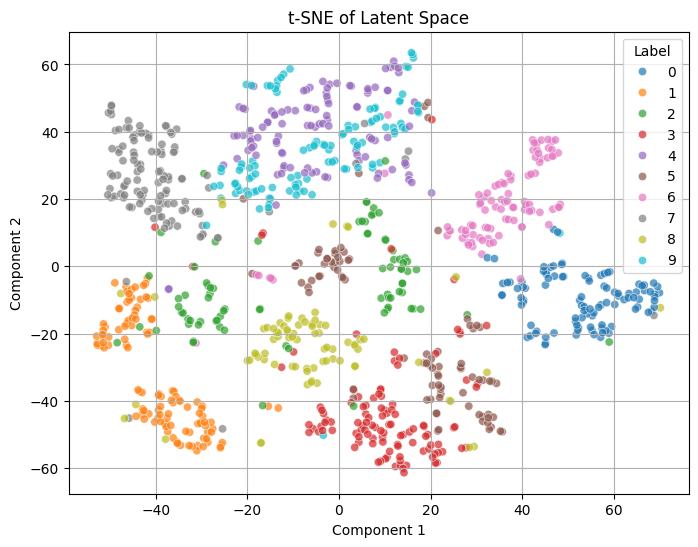

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=latent_df, x='Component 1', y='Component 2', hue='Label', palette='tab10', alpha=0.7)
plt.title('t-SNE of Latent Space')
plt.legend(title='Label', loc='upper right')
plt.grid(True)
plt.show()

In [39]:
#Visualize with tSne
latents_reshaped = latents_2.view(latents_2.shape[0], -1)  # Reshape to [20, 4*7*7]

# Convert to numpy array and apply PCA
latents_np = latents_reshaped.cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=1,perplexity=10)
latent_tsne = tsne.fit_transform(latents_np)

# Create a DataFrame for seaborn plotting
latent_df = pd.DataFrame(latent_tsne, columns=['Component 1', 'Component 2'])
latent_df['Label'] = labels#.detach().numpy().astype(str)

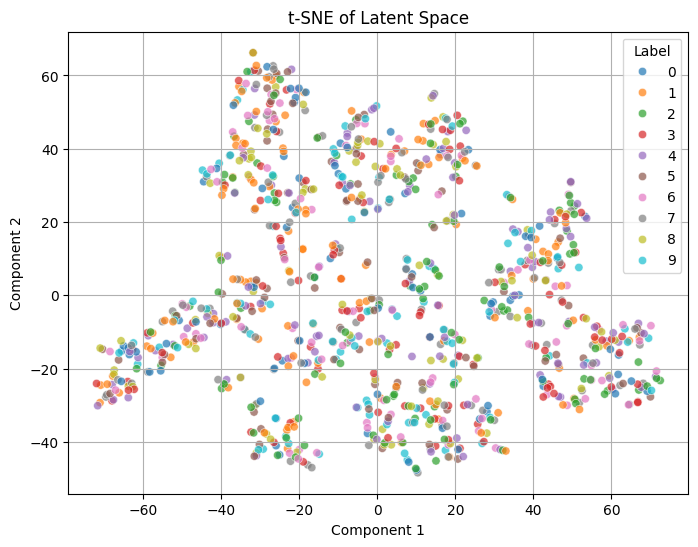

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=latent_df, x='Component 1', y='Component 2', hue='Label', palette='tab10', alpha=0.7)
plt.title('t-SNE of Latent Space')
plt.legend(title='Label', loc='upper right')
plt.grid(True)
plt.show()

In [41]:
#Visualize with tSne
latents_reshaped = latents_3.view(latents_3.shape[0], -1)  # Reshape to [20, 4*7*7]

# Convert to numpy array and apply PCA
latents_np = latents_reshaped.cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=1,perplexity=10)
latent_tsne = tsne.fit_transform(latents_np)

# Create a DataFrame for seaborn plotting
latent_df = pd.DataFrame(latent_tsne, columns=['Component 1', 'Component 2'])
latent_df['Label'] = labels#.detach().numpy().astype(str)

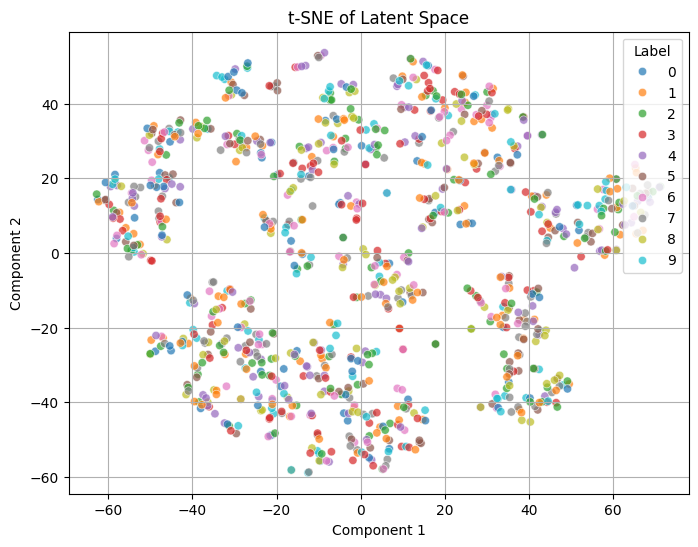

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=latent_df, x='Component 1', y='Component 2', hue='Label', palette='tab10', alpha=0.7)
plt.title('t-SNE of Latent Space')
plt.legend(title='Label', loc='upper right')
plt.grid(True)
plt.show()

In [43]:
#Visualize with tSne
latents_reshaped = latents_4.view(latents_4.shape[0], -1)  # Reshape to [20, 4*7*7]

# Convert to numpy array and apply PCA
latents_np = latents_reshaped.cpu().detach().numpy()
tsne = TSNE(n_components=2, random_state=1,perplexity=10)
latent_tsne = tsne.fit_transform(latents_np)

# Create a DataFrame for seaborn plotting
latent_df = pd.DataFrame(latent_tsne, columns=['Component 1', 'Component 2'])
latent_df['Label'] = labels#.detach().numpy().astype(str)

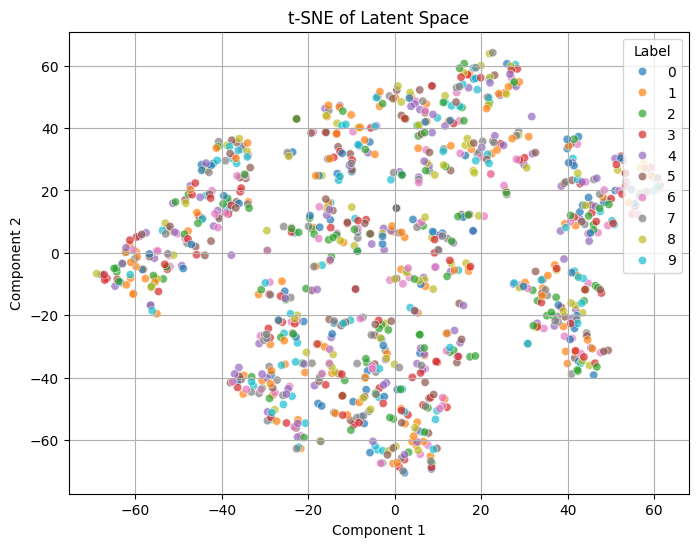

In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=latent_df, x='Component 1', y='Component 2', hue='Label', palette='tab10', alpha=0.7)
plt.title('t-SNE of Latent Space')
plt.legend(title='Label', loc='upper right')
plt.grid(True)
plt.show()

## Choose Anchors

In [27]:
from torch.utils.data import SubsetRandomSampler, DataLoader

# Define constants
batch_size = 5
num_workers = 0

# Total number of images in the training dataset
num_images = len(train_data)

# Generate random indices to select 5 random images
random_indices = np.random.choice(num_images, size=5, replace=False)

# Create a subset sampler using the random indices
random_subset_sampler = SubsetRandomSampler(random_indices)

# Create a data loader for the random subset
random_subset_loader = DataLoader(train_data,
                                  batch_size=batch_size,
                                  sampler=random_subset_sampler,
                                  num_workers=num_workers)


In [28]:
dataiter = iter(random_subset_loader)
anchors,anchors_labels = next(dataiter)
anchors_encoded = []
# Get encoding of anchors
for anchor in anchors:
    anchor = anchor.unsqueeze(0)
    anchor_encoded = model(anchor)
    anchors_encoded.append(anchor_encoded)
anchors_encoded = torch.stack(anchors_encoded)

In [29]:
print("Anchors shape {0}".format(anchors.shape))
print("Anchors encoded shape {0}".format(anchors_encoded.shape))

Anchors shape torch.Size([5, 1, 28, 28])
Anchors encoded shape torch.Size([5, 1, 1, 28, 28])


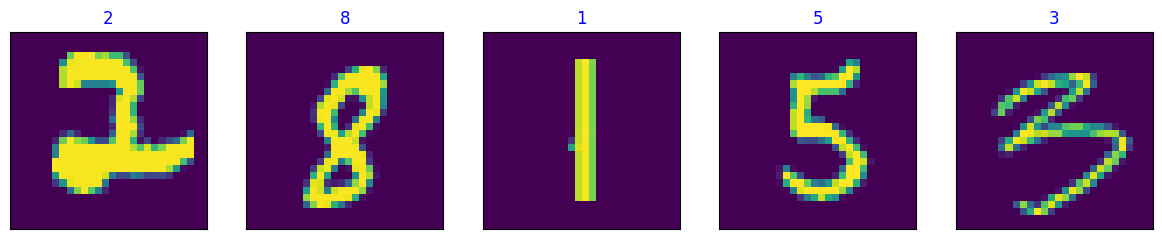

In [30]:
# Displaying the anchors
fig=plt.figure(figsize=(30,10))
for i in range(len(anchors_labels)):
    ax=fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
    plt.imshow(np.squeeze(anchors[i]))
    ax.set_title(anchors_labels[i].item(),color='blue')

## Compute distance and similarity fucntion

In [31]:
from torch import cosine_similarity

In [32]:
def compute_similarity_image(model,anchors,image):
    image_similarities=[]
    image = image.unsqueeze(0)
    image_encoded = model(image).flatten().reshape(1, -1)

    for anchor in anchors:
        anchor = anchor.unsqueeze(0)
        anchor_encoded = model(anchor).flatten().reshape(1, -1)
        print(anchor_encoded.shape)
        print(image_encoded.shape)
        
        similarity = cosine_similarity(anchor_encoded, image_encoded)
        image_similarities.append(similarity.cpu().detach().numpy())
    return image_similarities

def get_similarities(model, data_loader, anchors, max_batches=None):
    model.eval()
    similarities_list=[]
    labels_list = []
    num_batches_processed = 0

    for images, labels in data_loader:
        if torch.cuda.is_available():
            images = images.cuda()

        #Append the computed similiarities for each iamge
        for image in images:
            image_similarities = compute_similarity_image(model,anchors,image)
            similarities_list.append(image_similarities)
        labels_list.append(labels)

        num_batches_processed += 1
        if max_batches is not None and num_batches_processed >= max_batches:
            break  # Stop processing after reaching the specified max_batches

    # Concatenate the lists to create tensors for encoded images and labels
    similarities  = torch.tensor(similarities_list)
    labels = torch.cat(labels_list, dim=0)

    return similarities, labels


In [33]:
similarities,similarity_labels = get_similarities(model,train_loader,anchors,10)

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

/var/folders/tp/9l7ncvh137x08kdlp_fvr1nw0000gn/T/ipykernel_53136/1649291619.py:37: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)
  similarities  = torch.tensor(similarities_list)


In [34]:
#Get the similarities for the anchors
anchor_similarities = []
for anchor in anchors:  
    image_similarities = compute_similarity_image(model,anchors,anchor)
    anchor_similarities.append(image_similarities)
anchor_similarities = torch.tensor(anchor_similarities)

torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1, 784])
torch.Size([1

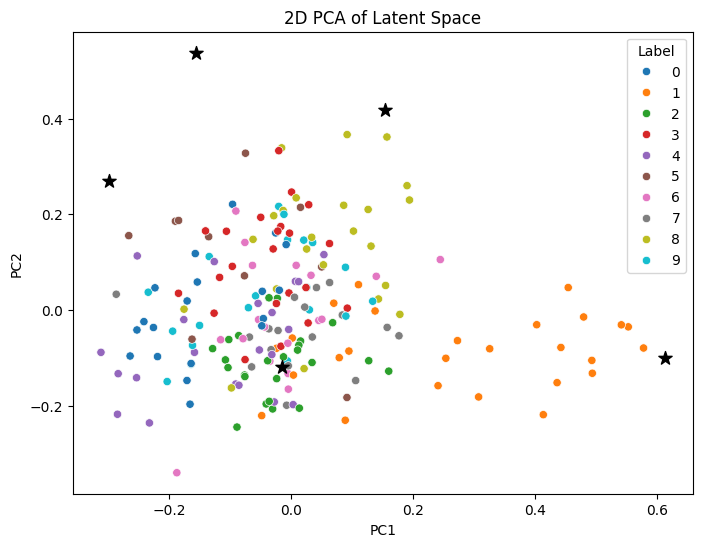

In [35]:
visualize_latent_space_pca(similarities,similarity_labels,anchor_similarities)

In [36]:
def compare_models(model1, model2):
    for (name1, param1), (name2, param2) in zip(model1.named_parameters(), model2.named_parameters()):
        if name1 != name2:
            print(f"Parameter name mismatch: {name1} vs {name2}")
            return False
        if not torch.equal(param1.data, param2.data):
            print(f"Parameter values mismatch at {name1}")
            return False
    return True

model_1 = LightningAutoencoder.load_from_checkpoint(checkpoint_path='LightningAutoencoder_0.ckpt')
model_2 = LightningAutoencoder.load_from_checkpoint(checkpoint_path='LightningAutoencoder_1.ckpt')
model_3 = LightningAutoencoder.load_from_checkpoint(checkpoint_path='LightningAutoencoder_2.ckpt')

print("Comparing model_1 and model_2:", compare_models(model_1, model_2))
print("Comparing model_1 and model_3:", compare_models(model_1, model_3))
print("Comparing model_2 and model_3:", compare_models(model_2, model_3))


Parameter values mismatch at autoencoder.encoder.0.0.weight
Comparing model_1 and model_2: False
Parameter values mismatch at autoencoder.encoder.0.0.weight
Comparing model_1 and model_3: False
Parameter values mismatch at autoencoder.encoder.0.0.weight
Comparing model_2 and model_3: False
